In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 50)

**Data description**

At Improvado, we use marketing common data models (MCDM) to map data from various ad platforms into a single one. MCDM can help marketers with questions like: "Where clicks better on facebook or tiktok?"

**Context**

Imagine that MCDM-model behind dashboard, is lost somehow. You need to rebuilt it.

**Content**

You have: 

- raw data from the ad systems (seeds folder),
- the MCDM table structure for this report,
- and dashboard

Use the raw data from the ad platforms and the MCDM table structure for the **ads_basic_performance** report.

In [2]:
df_tiktok = pd.read_csv('src_ads_tiktok_ads_all_data.csv')
df_facebook = pd.read_csv('src_ads_creative_facebook_all_data.csv')
df_bing = pd.read_csv('src_ads_bing_all_data.csv')
df_twitter = pd.read_csv('src_promoted_tweets_twitter_all_data.csv')

df_mcdm_structure = pd.read_csv('mcdm_paid_ads_basic_performance_structure.csv')

In [3]:
dfs = [df_tiktok, df_facebook, df_bing, df_twitter, df_mcdm_structure]
for i in dfs:
    print(i.shape)

(2345, 19)
(3212, 30)
(1546, 14)
(3130, 15)
(25, 3)


# Hints
- **Cost per engage** is just a spended sum divided by sum of engagements
- **Conversion cost** is calculated by dividing sum of spended by total conversions count
- **Impressions by channel** is a sum of impressions for each channel
- **CPC** gets like sum of spended divided by clicks count

## Features

In [4]:
def int_to_float(df, column):
    df[column] = df[column].astype(float)
    return 

In [5]:
def bar_plot(df, Xc, Yc, log=False, ysort=lambda y: -y, yformat=lambda y: f'{y:.2f}',
             y_axis_major_format=None, y_axis_minor_format=None):
    X, Y = df[Xc], df[Yc]
    if ysort is not None:
        XY = sorted(zip(X, Y), key=lambda xy: ysort(xy[1]))
        X, Y = zip(*XY)
    fig, ax = plt.subplots()
    ax.bar(X, Y, log=log)
    if y_axis_major_format is not None:
        ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, pos: y_axis_major_format(y)))
    if y_axis_minor_format is not None:
        ax.get_yaxis().set_minor_formatter(ticker.FuncFormatter(lambda y, pos: y_axis_minor_format(y)))
    for i, y in enumerate(Y):
        if y > 0:
            plt.text(i, y, yformat(y), horizontalalignment='center', verticalalignment='bottom')
    plt.title(Yc)
    plt.show()

## 1. TikTok Ads

In [6]:
df_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   __insert_date     2345 non-null   object
 1   ad_id             2345 non-null   int64 
 2   add_to_cart       2345 non-null   int64 
 3   adgroup_id        2345 non-null   int64 
 4   campaign_id       2345 non-null   int64 
 5   channel           2345 non-null   object
 6   clicks            2345 non-null   int64 
 7   date              2345 non-null   object
 8   impressions       2345 non-null   int64 
 9   rt_installs       2345 non-null   int64 
 10  skan_app_install  2345 non-null   int64 
 11  ad_status         2345 non-null   object
 12  ad_text           2325 non-null   object
 13  purchase          2345 non-null   int64 
 14  registrations     2345 non-null   int64 
 15  spend             2345 non-null   int64 
 16  conversions       2345 non-null   int64 
 17  skan_conversio

In [7]:
int_to_float(df_tiktok,'clicks')
int_to_float(df_tiktok,'conversions')

In [8]:
query = """
SELECT 
    channel, 
    0 AS 'Cost per engage',
    sum(spend) / sum(conversions) AS 'Conversion cost',
    sum(impressions) AS 'Impressions by channel', 
    sum(spend) / sum(clicks) AS 'CPC' 
FROM df_tiktok 
"""
ps.sqldf(query, locals())

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,TikTok Ads,0,2719.58,37887685,0.96


## 2. Facebook  

In [9]:
int_to_float(df_facebook,'clicks')
int_to_float(df_facebook,'views')
int_to_float(df_facebook,'purchase')

In [10]:
query2 = """
SELECT
    channel, 
    sum(spend) / sum(views) AS 'Cost per engage',
    sum(spend) / sum(purchase) AS 'Conversion cost',
    sum(impressions) AS 'Impressions by channel', 
    sum(spend) / sum(clicks) AS 'CPC'
FROM df_facebook
"""
ps.sqldf(query2, locals())

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,Facebook,0.14,13.60,7145448,1.00


## 3. Bing  

In [11]:
int_to_float(df_bing,'clicks')
int_to_float(df_bing,'conv')

In [12]:
query3 = """
SELECT
channel, 
0 AS 'Cost per engage',
sum(spend) / sum(conv) AS 'Conversion cost',
0 AS 'Impressions by channel',
sum(spend) / sum(clicks) AS 'CPC'
FROM df_bing
"""
ps.sqldf(query3, locals())

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,Bing,0,18.44,0,1.19


## 4. Twitter  

In [13]:
int_to_float(df_twitter,'clicks')
int_to_float(df_twitter,'engagements')

In [14]:
query4 = """
SELECT 
channel, 
sum(spend)/ sum(engagements) AS 'Cost per engage',
0 AS 'Conversion cost',
sum(impressions) AS 'Impressions by channel',
sum(spend) / sum(clicks) AS 'CPC'
FROM df_twitter
"""
ps.sqldf(query4, locals())

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,Twitter,0.48,0,9642974,0.52


## 5. Combine data for visualisation

In [15]:
query5 = """
SELECT 
    channel, 
    0 AS 'Cost per engage',
    sum(spend) / sum(conversions) AS 'Conversion cost',
    sum(impressions) AS 'Impressions by channel', 
    sum(spend) / sum(clicks) AS 'CPC' 
FROM df_tiktok 

UNION

SELECT
    channel, 
    sum(spend) / sum(views) AS 'Cost per engage',
    sum(spend) / sum(purchase) AS 'Conversion cost',
    sum(impressions) AS 'Impressions by channel', 
    sum(spend) / sum(clicks) AS 'CPC'
FROM df_facebook

UNION

SELECT
channel, 
0 AS 'Cost per engage',
sum(spend) / sum(conv) AS 'Conversion cost',
0 AS 'Impressions by channel',
sum(spend) / sum(clicks) AS 'CPC'
FROM df_bing

UNION

SELECT 
channel, 
sum(spend)/ sum(engagements) AS 'Cost per engage',
0 AS 'Conversion cost',
sum(impressions) AS 'Impressions by channel',
sum(spend) / sum(clicks) AS 'CPC'
FROM df_twitter
"""
ps.sqldf(query5, locals())

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,Bing,0.00,18.44,0,1.19
1,Facebook,0.14,13.60,7145448,1.00
2,TikTok Ads,0.00,2719.58,37887685,0.96
3,Twitter,0.48,0.00,9642974,0.52


In [16]:
df = ps.sqldf(query5, locals())
df

,channel,Cost per engage,Conversion cost,Impressions by channel,CPC
0,Bing,0.00,18.44,0,1.19
1,Facebook,0.14,13.60,7145448,1.00
2,TikTok Ads,0.00,2719.58,37887685,0.96
3,Twitter,0.48,0.00,9642974,0.52


In [17]:
def bar_plot(df, Xc, Yc, log=False, ysort=lambda y: -y, yformat=lambda y: f'{y:.2f}',
             y_axis_major_format=None, y_axis_minor_format=None):
    X, Y = df[Xc], df[Yc]
    if ysort is not None:
        XY = sorted(zip(X, Y), key=lambda xy: ysort(xy[1]))
        X, Y = zip(*XY)
    fig, ax = plt.subplots()
    ax.bar(X, Y, log=log)
    if y_axis_major_format is not None:
        ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, pos: y_axis_major_format(y)))
    if y_axis_minor_format is not None:
        ax.get_yaxis().set_minor_formatter(ticker.FuncFormatter(lambda y, pos: y_axis_minor_format(y)))
    for i, y in enumerate(Y):
        if y > 0:
            plt.text(i, y, yformat(y), horizontalalignment='center', verticalalignment='bottom')
    plt.title(Yc)
    plt.show()

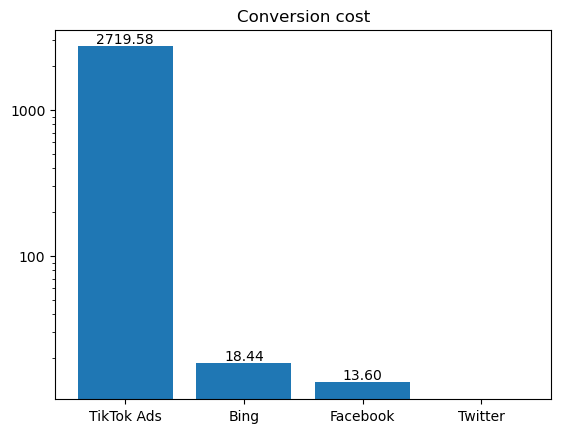

In [18]:
bar_plot(df, 'channel', 'Conversion cost', log=True, y_axis_major_format=lambda y: f'{y:.0f}')

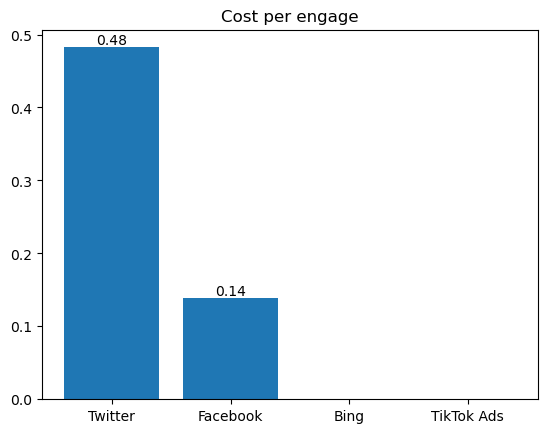

In [19]:
bar_plot(df, 'channel', 'Cost per engage')

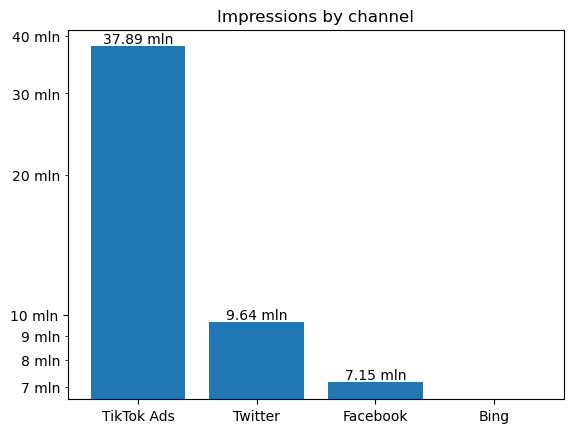

In [20]:
bar_plot(df, 'channel', 'Impressions by channel', log=True,
         yformat=lambda y: f'{y/1e6:.2f} mln',
         y_axis_major_format=lambda y: f'{int(y/1e6)} mln',
         y_axis_minor_format=lambda y: f'{int(y/1e6)} mln')

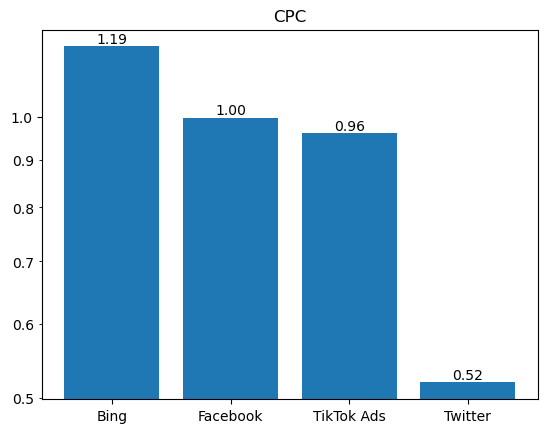

In [21]:
bar_plot(df, 'channel', 'CPC', log=True,
         y_axis_major_format=lambda y: f'{y:.1f}',
         y_axis_minor_format=lambda y: f'{y:.1f}')

## MCDM - REBUILD

In [22]:
df_new = pd.DataFrame(columns=df_mcdm_structure['mcdm_field_name'])

In [23]:
list(df_new)

['ad_id',
 'add_to_cart',
 'adset_id',
 'campaign_id',
 'channel',
 'clicks',
 'comments',
 'creative_id',
 'date',
 'engagements',
 'impressions',
 'installs',
 'likes',
 'link_clicks',
 'placement_id',
 'post_click_conversions',
 'post_view_conversions',
 'posts',
 'purchase',
 'registrations',
 'revenue',
 'shares',
 'spend',
 'total_conversions',
 'video_views']

In [24]:
df_tiktok.rename(columns={'conversions': 'total_conversions'}, inplace=True)                
df_twitter.rename(columns={'video_total_views': 'video_views'}, inplace=True)               
df_bing.rename(columns={'conv': 'total_conversions'}, inplace=True)                
df_facebook.rename(columns={'views': 'video_views'}, inplace=True)

In [25]:
df_new.columns = map(str.lower, df_new.columns)
df_tiktok.columns = map(str.lower, df_tiktok.columns)
df_facebook.columns = map(str.lower, df_facebook.columns)
df_bing.columns = map(str.lower, df_bing.columns)
df_twitter.columns = map(str.lower, df_twitter.columns)

In [26]:
df_mcdm = pd.concat([df_new, df_tiktok, df_facebook, df_bing, df_twitter])

In [27]:
df_final = df_mcdm[list(df_new)]
df_final

,ad_id,add_to_cart,adset_id,campaign_id,channel,clicks,comments,creative_id,date,engagements,impressions,installs,likes,link_clicks,placement_id,post_click_conversions,post_view_conversions,posts,purchase,registrations,revenue,shares,spend,total_conversions,video_views
0,33.00,0.00,NaN,33,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,101.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,92.00
1,40.00,0.00,NaN,40,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,309.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,2,0.00,282.00
2,17.00,0.00,NaN,17,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,0.00
3,50.00,0.00,NaN,50,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,91.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,87.00
4,26.00,0.00,NaN,26,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,NaN,NaN,NaN,7,Twitter,0.00,0.00,NaN,2023-01-01,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.00
3126,NaN,NaN,NaN,3,Twitter,0.00,0.00,NaN,2023-01-01,0.00,101.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,35.00
3127,NaN,NaN,NaN,43,Twitter,0.00,0.00,NaN,2023-01-01,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.00
3128,NaN,NaN,NaN,8,Twitter,22.00,0.00,NaN,2023-01-01,22.00,8602.00,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,0.00


## MCDM is ready

In [28]:
df_final.head()

,ad_id,add_to_cart,adset_id,campaign_id,channel,clicks,comments,creative_id,date,engagements,impressions,installs,likes,link_clicks,placement_id,post_click_conversions,post_view_conversions,posts,purchase,registrations,revenue,shares,spend,total_conversions,video_views
0,33.00,0.00,NaN,33,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,101.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,92.00
1,40.00,0.00,NaN,40,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,309.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,2,0.00,282.00
2,17.00,0.00,NaN,17,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,0.00
3,50.00,0.00,NaN,50,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,91.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,87.00
4,26.00,0.00,NaN,26,TikTok Ads,0.00,NaN,NaN,2023-02-07,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0,0.00,0.00


## Let's check it

In [29]:
query_f = """
SELECT 
    channel,
    SUM(impressions)  AS 'Impressions by channel',
    SUM(spend) / sum(clicks) AS 'CPC',
    CASE
        WHEN channel in ('TikTok Ads', 'Bing') THEN sum(spend)/sum(total_conversions)
        ELSE sum(spend) / sum(purchase)
    END AS 'Conversion cost',
    CASE
        WHEN  channel = 'Facebook' THEN sum(spend)/sum(video_views)
        ELSE sum(spend)/sum(engagements) 
    END AS 'Cost per engage'
    
FROM df_final
GROUP BY channel
"""
ps.sqldf(query_f, locals())

,channel,Impressions by channel,CPC,Conversion cost,Cost per engage
0,Bing,NaN,1.19,18.44,NaN
1,Facebook,7145448.00,1.00,13.60,0.14
2,TikTok Ads,37887685.00,0.96,2719.58,NaN
3,Twitter,9642974.00,0.52,NaN,0.48
